In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [5]:
# copy demo into current directory
ac.copydemo('r3b')

# run the r3b routines, if needed, to generate the families of periodic solutions
runner = ra.runAUTO()
if not os.path.exists('s.H1'):
    # mass ratio
    mu = 0.063

    print("\n***Compute libration points")
    r1=ac.run('r3b',UZR={'mu':mu},runner=runner)
    import compute_lps
    compute_lps.write_lagrange(r1)

    print("\n***Lagrange family L1***")
    L1=ac.run(r1('UZ7'),c='r3b.L1',runner=runner)
    ac.save('L1')

    print("\n***Halo family H1***")
    ac.run(L1('BP1'),c='r3b.H1',runner=runner)
    ac.save('H1')

    print("\n***Vertical family V1***")
    ac.run(r1('UZ7'),e='r3b',c='r3b.V1',runner=runner)
    ac.save('V1')
    
    ac.clean()

Copying demo r3b ... done


In [8]:
# run routines for Halo family H1

import data
runner = ra.runAUTO()

print("\n*** Compute the Floquet eigenfunction***")
H1 = ac.loadbd('H1')
flq = ac.run(H1(7),c='r3b.flq',sv='flq',runner=runner)

print("\n*** Extract data for the selected orbit from s.flq***")
startman = data.get(flq('UZ1'),eps=-1e-3)

print("\n*** Time integration using continuation***")
startH1a = ac.run(startman,e='man',c='man.H1a.0',sv='startH1a',runner=runner)

print("\n*** Compute part of the unstable manifold***")
startUZs = startH1a('UZ')
startUZ = startUZs[0]
for s in startUZs:
    # find minimum
    if abs(s.PAR(21)) < abs(startUZ.PAR(21)):
        startUZ = s
H1a = ac.run(startUZ,c='man.H1a.1',runner=runner)
ac.save(ac.relabel(H1a),'H1a')

print ("\n***Clean the directory***")
ac.clean()


*** Compute the Floquet eigenfunction***
Parsed output data
Starting r3b ...

  BR    PT  TY  LAB     lambda       L2-NORM        MAX x         MAX y         MAX z         MAX xp          fm           rho      
  15    22  UZ    1   7.63683E-13   1.44785E+00   9.27001E-01   2.27917E-01   3.08092E-01   3.03160E-01   1.06112E+01   1.00000E+00

 Total Time    0.110E+00
r3b ... done
Saving to b.flq, s.flq, and d.flq ... done

*** Extract data for the selected orbit from s.flq***
Runner configured

*** Time integration using continuation***
Starting man ...

  BR    PT  TY  LAB    PAR(11)       L2-NORM        MAX x        PAR(12)          E          PAR(21)       PAR(22)       PAR(23)    
   1   320  UZ    2   9.85401E+00   1.01069E+00   9.26942E-01   5.73628E+00  -1.46558E+00   5.00016E-01   2.11605E-01  -3.16011E-01
   1   335  UZ    3   1.01621E+01   1.01210E+00   9.26941E-01   6.01226E+00  -1.46558E+00   2.50034E-01   2.49665E-01  -2.07907E-01
   1   344  UZ    4   1.03446E+01   1.0272

   1    51       57  -2.54163E-03   1.03654E+00   9.26850E-01   8.79440E+00   5.69989E+00  -1.46558E+00   6.21696E-01  -1.67403E-01
   1    52       58  -2.56884E-03   1.03758E+00   9.26848E-01   8.76060E+00   5.68613E+00  -1.46558E+00   6.13892E-01  -1.54704E-01
   1    53       59  -2.59734E-03   1.03863E+00   9.26844E-01   8.72699E+00   5.67201E+00  -1.46558E+00   6.05643E-01  -1.41794E-01
   1    54       60  -2.62725E-03   1.03969E+00   9.26845E-01   8.69357E+00   5.65753E+00  -1.46558E+00   5.96931E-01  -1.28708E-01
   1    55       61  -2.65870E-03   1.04075E+00   9.26842E-01   8.66036E+00   5.64269E+00  -1.46558E+00   5.87739E-01  -1.15486E-01
   1    56       62  -2.69181E-03   1.04181E+00   9.26841E-01   8.62735E+00   5.62751E+00  -1.46558E+00   5.78051E-01  -1.02168E-01
   1    57       63  -2.72674E-03   1.04288E+00   9.26837E-01   8.59454E+00   5.61200E+00  -1.46558E+00   5.67850E-01  -8.87969E-02
   1    58       64  -2.76363E-03   1.04396E+00   9.26837E-01   8.56194E+00 

Unknown column name: x
Unknown column name: y
Created plot


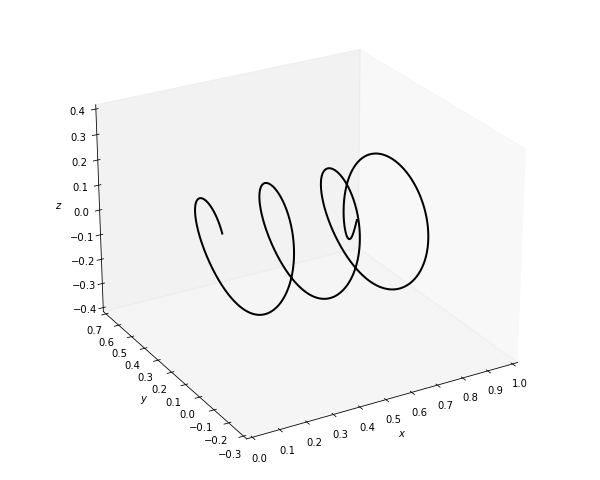

In [11]:
# plot an example solution

p = ac.plot('H1a')
p.config(type='solution')
p.config(grid=False)
p.config(solution_z='z')
p.config(label=[15])
p.savefig('b.png')
display(Image.open('b.png'))

In [13]:
# clean up files

for f in ['L1', 'H1', 'V1',
            'H1a', 'H1b', 'H1c', 'V1a', 'V1b', 'L1a', 'L1a2',
           'startH1a', 'startH1b', 'startH1c',
           'startV1a', 'startV1b', 'startL1a',
           'ext', 'flq', 'start', 'startman',
           'hetH1a', 'het1H1b', 'het2H1a', 'het2H1b', 'hetV1b']:
   ac.delete(f)

ac.clean()


Deleting fort.* *.o *.exe *.*~ ... done
